In [340]:
#Тут обрабатываем данные с помощью t-SNE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
import pylab as pl

%matplotlib inline

In [341]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

In [ ]:
##Извлечем информацию из файла

dtrain = pd.read_csv('hard_train.txt', header = None, sep = '\\s+')
dlabels = pd.read_csv('hard_train_labels.txt', header = None, sep = '\\s+')

In [ ]:
#Ограничимся 6000 картинками, и кстати на 4-х ядерном процессоре t-SNE работает довольно быстро

dtrain.shape
new_dtrain = np.array(dtrain[:6000])
new_dlabels = np.array(dlabels[:6000])

In [ ]:
#Посмотрим на рандомную картинку из выборки картину.

first_image = new_dtrain[4].reshape(28, 28)

pl.gray()
pl.matshow(first_image)
pl.show()

In [ ]:
X = np.vstack(new_dtrain)
y = np.hstack(new_dlabels)

In [347]:
#Запускаем TSNE, вкладываем в просстранство размерности 2, n_components=2 по дефолту. 

RS = 20150101
digits_proj = TSNE(random_state=RS).fit_transform(X)

In [348]:
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [349]:
#Метод для красивой отрисовки. Взял с сайта и немного подправил.

def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=20)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=3, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

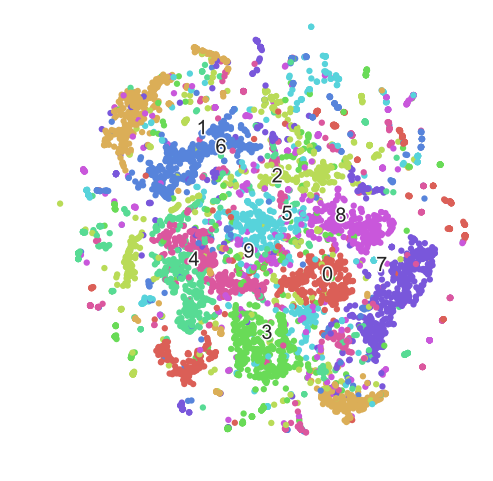

In [350]:
#Смотри, что получилось.

scatter(digits_proj, y)
plt.show()

In [334]:
#Далее проделываем с KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
from sklearn.metrics import accuracy_score

In [337]:
#Обучаемся на 5000 крартинках

X_train = X[:5000]
y_train = y[:5000]

model = KNeighborsClassifier(n_neighbors=3, algorithm='brute')
model.fit(X_train, y_train)
print model

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


In [338]:
#берем тестовую выборку.
X_test = X[5000:6000]
y_test = y[5000:6000]

#Ошибки на обучении и на тесте.
print zero_one_loss(y_train, model.predict(X_train))
print zero_one_loss(y_test, model.predict(X_test))

0.0816
0.149


In [339]:
#Считаем accuracy.

accuracy_score(y_test, model.predict(X_test))

0.85099999999999998